# Testing Different Machine Learning Algorithms and Models to Predict Home Loan Approval 

# Introduction

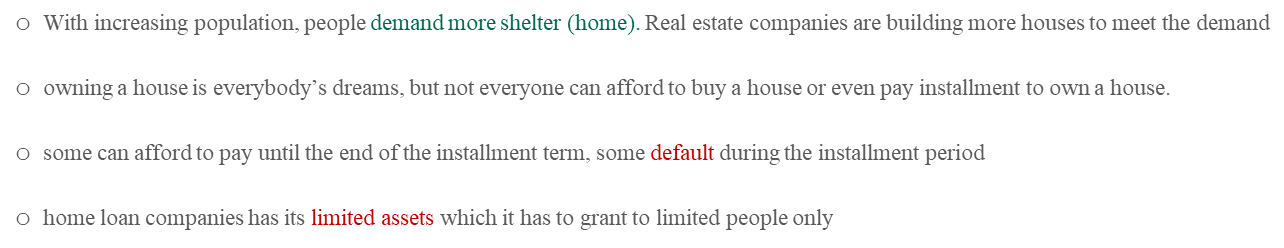

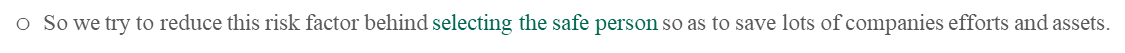
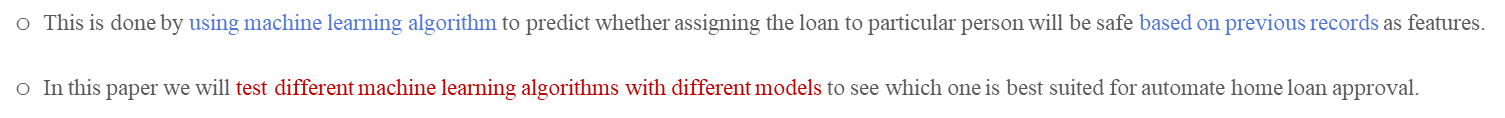


# Dataset

The data was obtained from kaggle.com where Dream Housing Finance Company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form.

The data consists of 614 rows and 13 columns.

Variable given:

-Loan-ID: Customer ID

-Gender: Male or Female

-Married: single or married

-Dependents: how many children applicants have

-Education: Graduate or not graduate

-Self_Employed : self-employed or not

-ApplicantIncome: Income of applicant

-CoapplicantIncome: Income of coapplicant

-LoanAmount: loan amount in thousand

-Loan_Amount_Term: in month

-Credit_History: whether they have credit before

-Property_Area: urban, semi urban, rural

-Loan_status: yes or no

# Import Data

In [85]:
import pandas as pd
import numpy as np
data = pd.read_csv("loan_sanction.csv")

print(data.shape)
#print(data)

(614, 13)


In [86]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [87]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [88]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [90]:
#check missing value
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

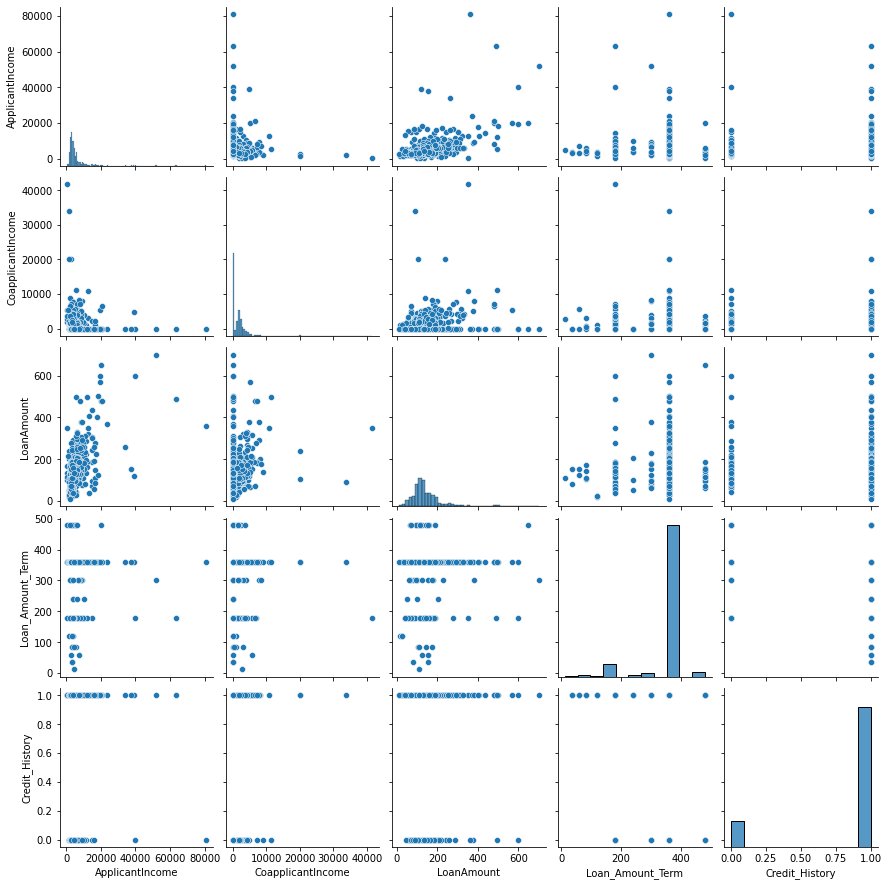

In [ ]:
import seaborn as sns
sns.pairplot(data)

we can see that the data is not balanced. so I fill missing value with mode.

In [91]:
#fill na with mode 
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['LoanAmount']= data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])

#Change '3+' to '3'
data['Dependents'] = data['Dependents'].replace('3+', 3).astype('int')


#check if there is still any missing value
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [92]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [93]:
#drop columns 
data=data.drop(['Loan_ID'], axis=1)

data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data visualization

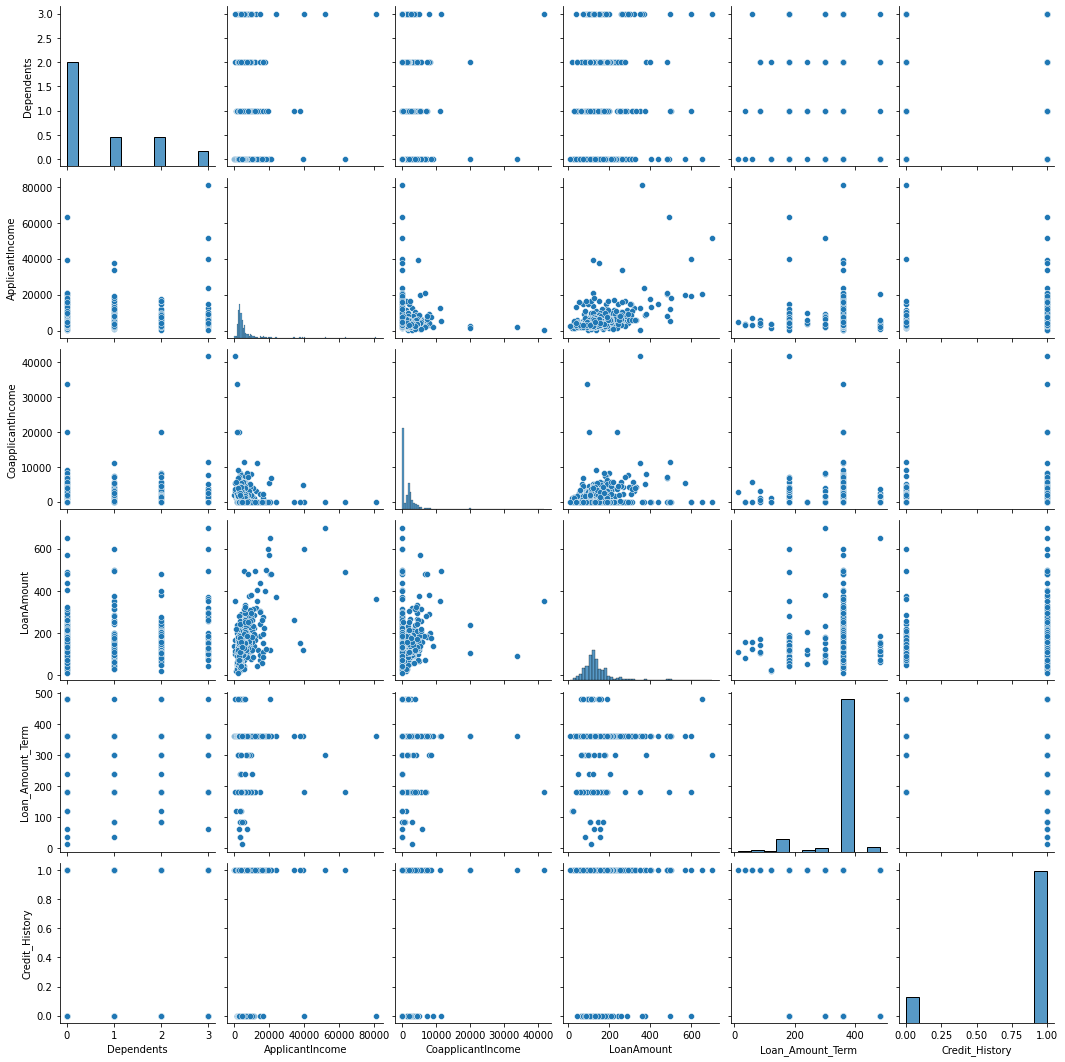

In [ ]:
import seaborn as sns
sns.pairplot(data)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

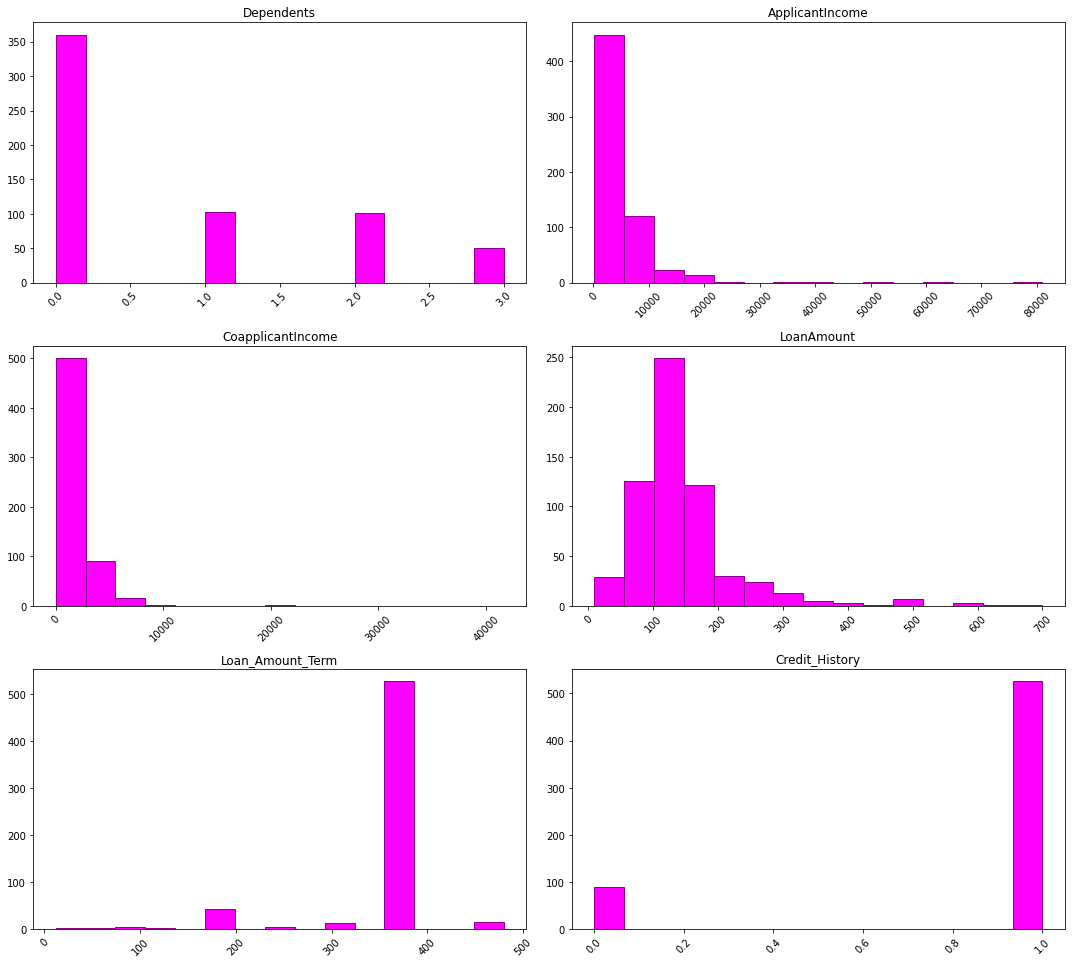

In [ ]:
fig = data.hist(bins=15, color='fuchsia', edgecolor='darkmagenta', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

In [ ]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

The data is slightly imbalanced. Almost 69% was approved(Y).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


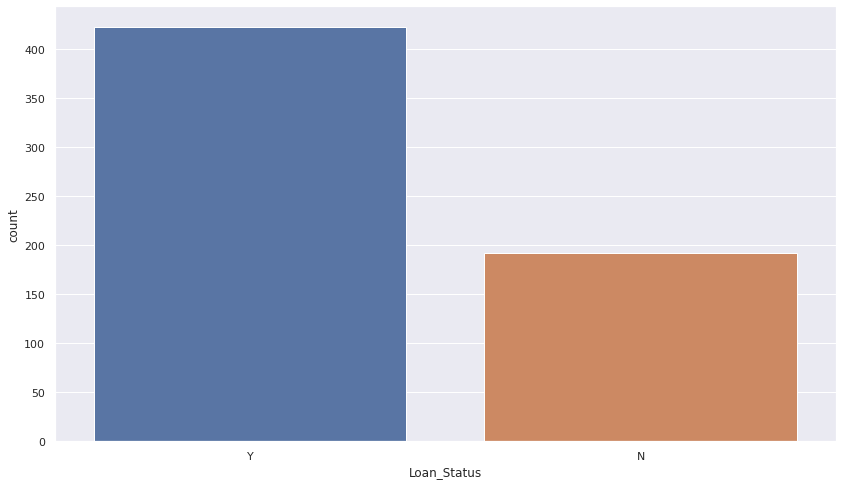

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(data['Loan_Status'])

According to the past 614 observation,alomost 200 applications were rejected.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


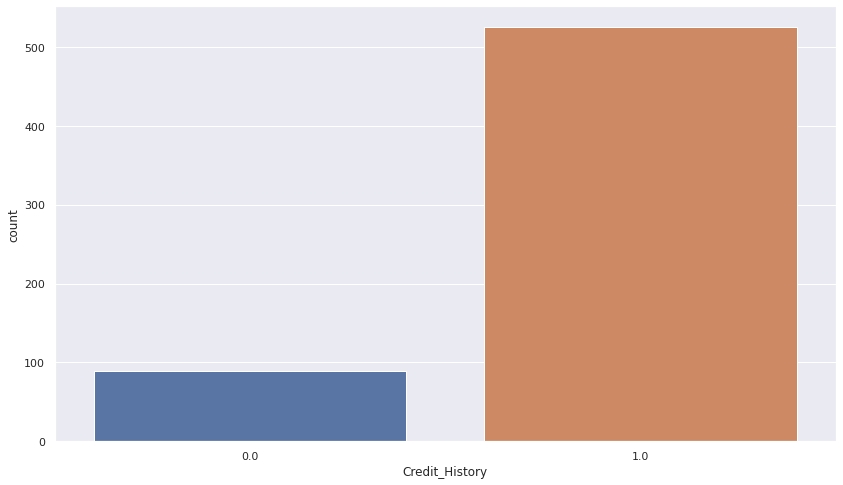

In [ ]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(data['Credit_History'])

Most people who apply for home loan at Dream Housing Finance Company has credit history.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


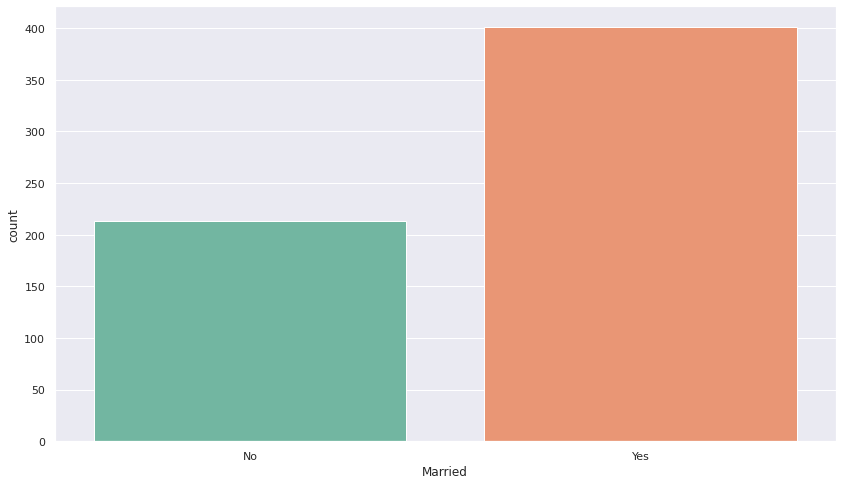

In [ ]:
sns.countplot(data['Married'], palette='Set2')

Those who are married applied for home loan more than those who are not.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


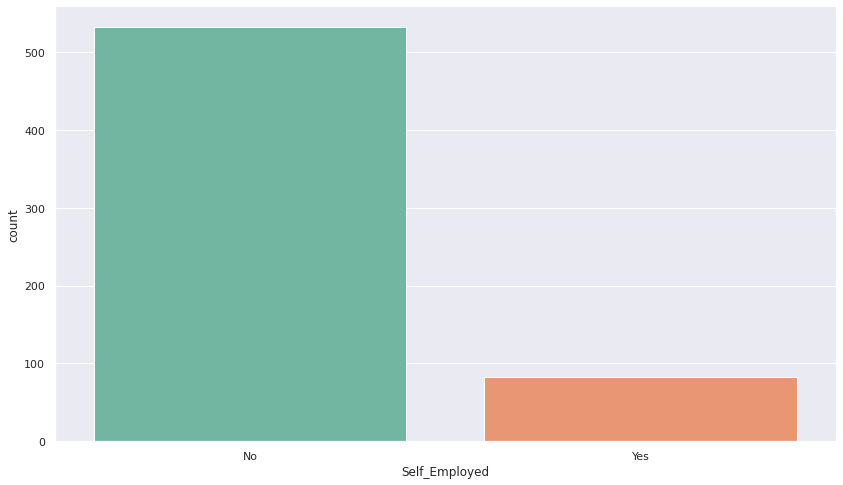

In [ ]:
sns.countplot(data['Self_Employed'], palette='Set2')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


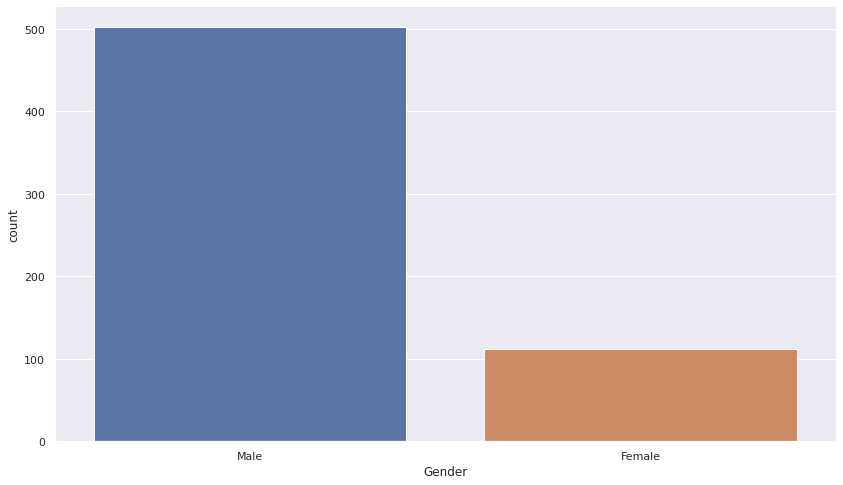

In [96]:
import seaborn as sns

sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(data['Gender'])

Most of applicants who apply for home loan at Dream Housing Finance company are not self-employed.

120.0    42
110.0    17
100.0    15
Name: LoanAmount, dtype: int64


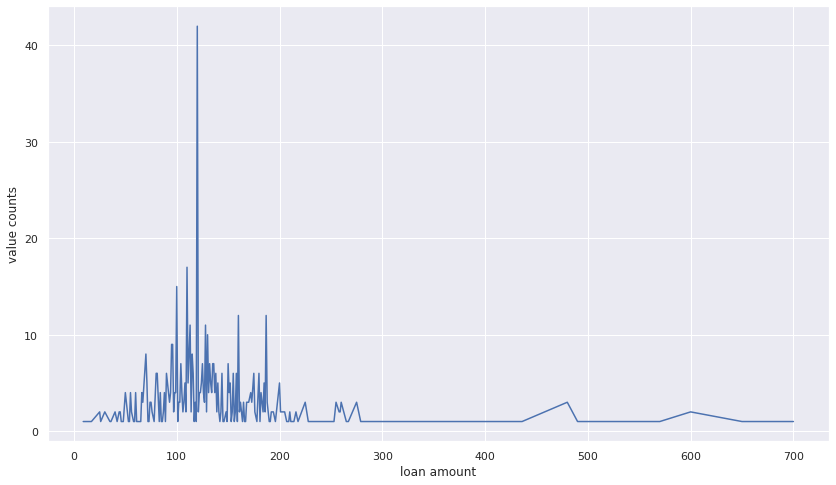

In [ ]:
data['LoanAmount'].value_counts().sort_index().plot()
plt.xlabel('loan amount',fontsize = 12)
plt.ylabel('value counts',fontsize = 12)
print(data['LoanAmount'].value_counts().head(3))

we can see that most of the loan amount that customers took were slighly above 100k USD.

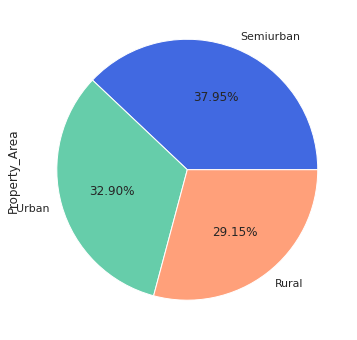

In [ ]:
plt.figure(figsize=(8,6))
data['Property_Area'].value_counts().plot(kind='pie',autopct='%.2f%%', colors=['#4169E1', '#66CDAA','#FFA07A'])

According to this pie chart we can see that alomost 38% of people who applied for home loan at Dream Housing Finance Company are likely to buy property in semiurban area followed by Urban area which is alomost 33%.

Text(0, 0.5, 'value counts')

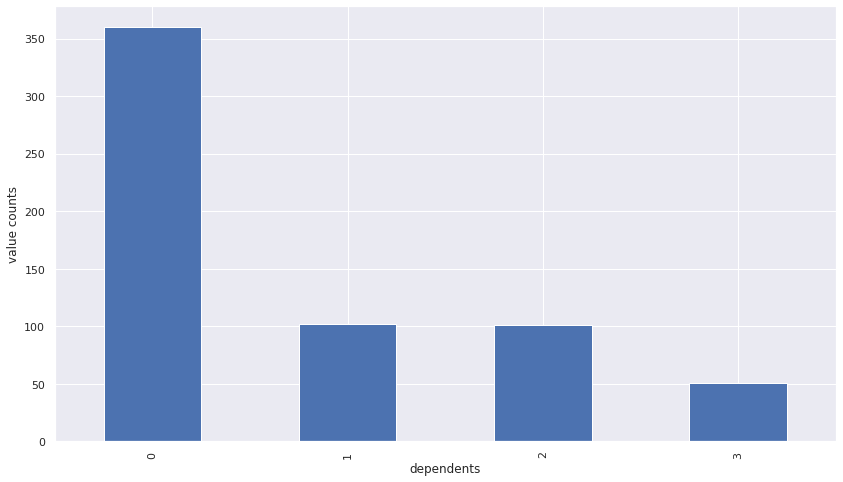

In [ ]:
data['Dependents'].value_counts().plot.bar()
plt.xlabel('dependents',fontsize = 12)
plt.ylabel('value counts',fontsize = 12)

According to this Bar chart, most of people who applied for home loan are those who is yet to have kid.

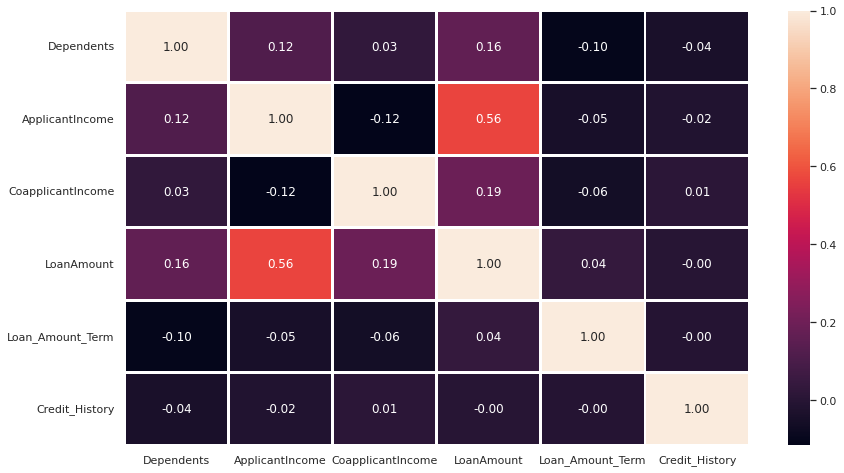

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=2)

This heatmap depicts correlation between variables.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


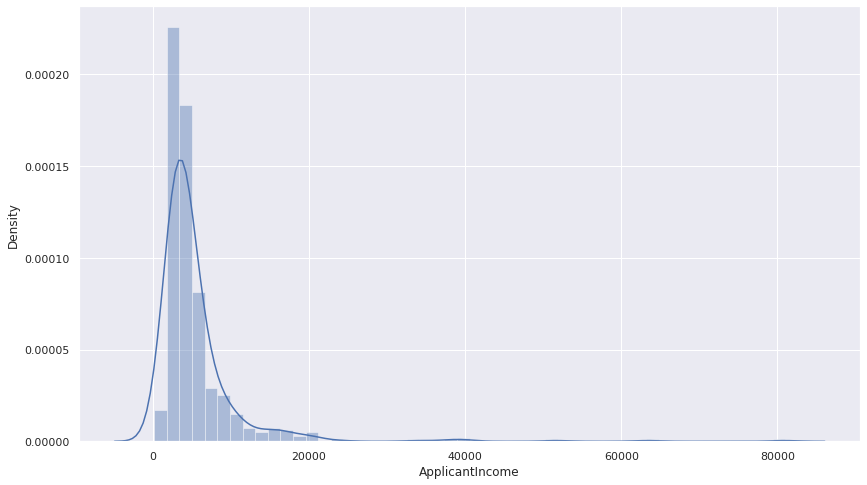

In [ ]:
sns.distplot(data['ApplicantIncome'])

In [ ]:
#Calculate skewness
from scipy.stats import skew

skew(data['ApplicantIncome'])

6.523526250899361

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


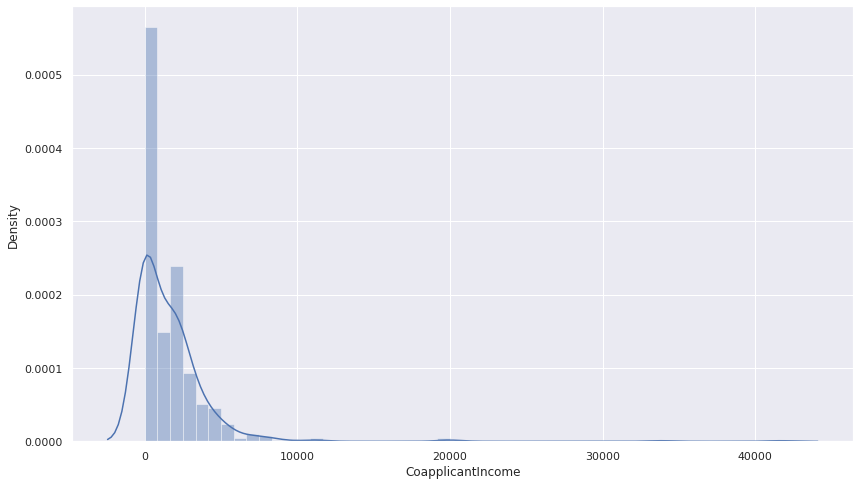

In [ ]:
sns.distplot(data['CoapplicantIncome'])

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


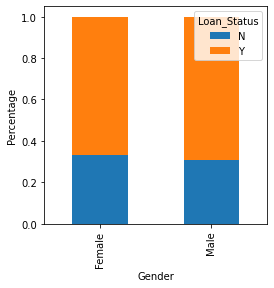

In [95]:
#Relation between "Loan_Status" and "Gender"
import matplotlib.pyplot as plt

print(pd.crosstab(data["Gender"],data["Loan_Status"]))
Gender = pd.crosstab(data["Gender"],data["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Proportion of Male applicants is higher for the approved loans.

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


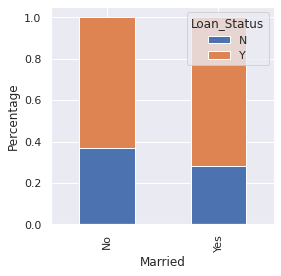

In [98]:
#Relation between "Loan_Status" and "Married"
print(pd.crosstab(data["Married"],data["Loan_Status"]))
Married=pd.crosstab(data["Married"],data["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Proportion of Married applicants is higher for the approved loans.

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3             18   33


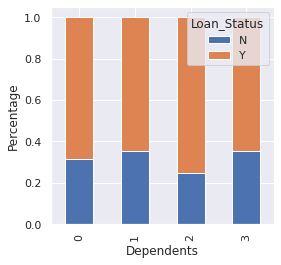

In [99]:
# Loan_Status & Dependents
print(pd.crosstab(data['Dependents'],data["Loan_Status"]))
Dependents = pd.crosstab(data['Dependents'],data["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


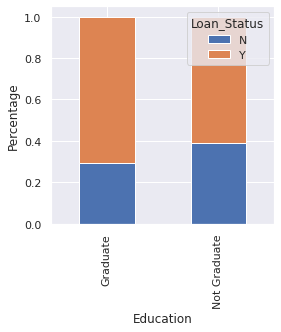

In [100]:
print(pd.crosstab(data["Education"],data["Loan_Status"]))
Education = pd.crosstab(data["Education"],data["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Proportion of Graduate applicants is higher for the approved loans.

Loan_Status       N    Y
Credit_History          
0.0              82    7
1.0             110  415


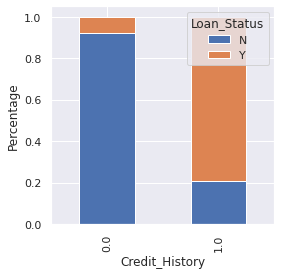

In [101]:
print(pd.crosstab(data["Credit_History"],data["Loan_Status"]))
CreditHistory = pd.crosstab(data["Credit_History"],data["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

It seems people with credit history as 1 are more likely to get their loans approved.

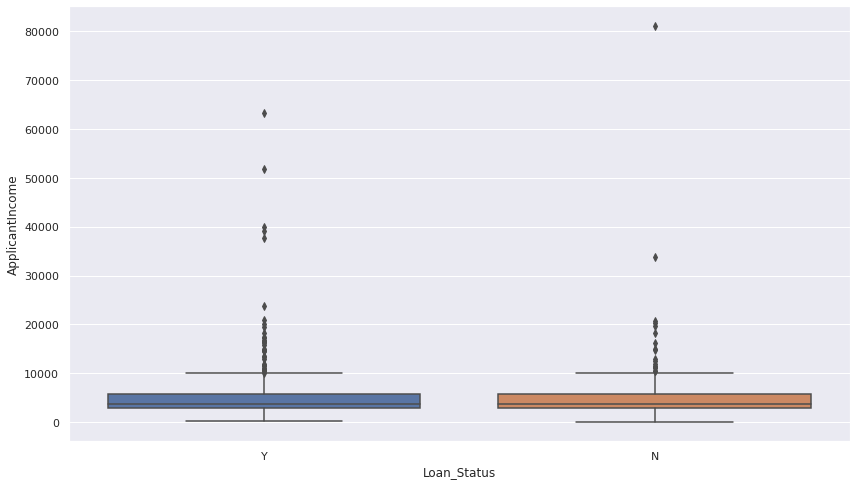

In [ ]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data = data)

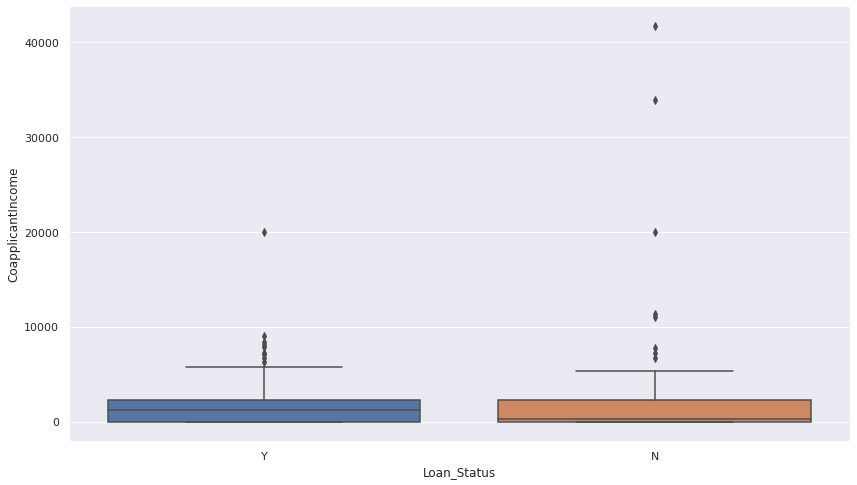

In [ ]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data = data)

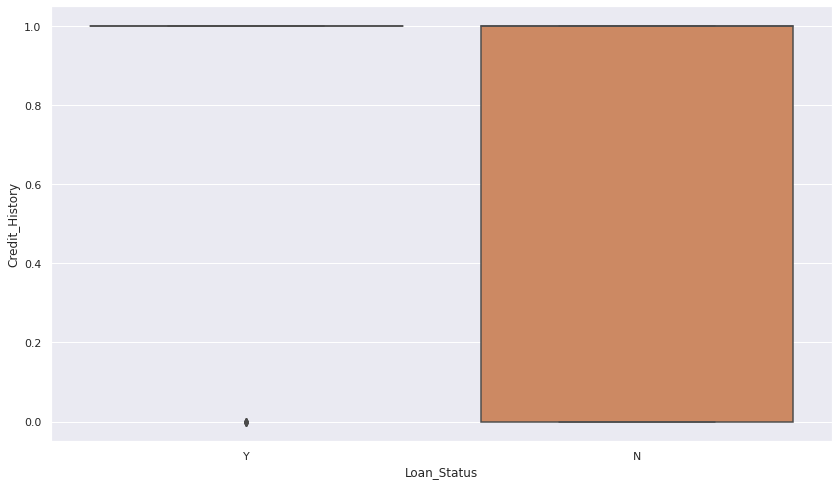

In [ ]:
sns.boxplot(x='Loan_Status', y='Credit_History', data = data)

# 3D visualisation

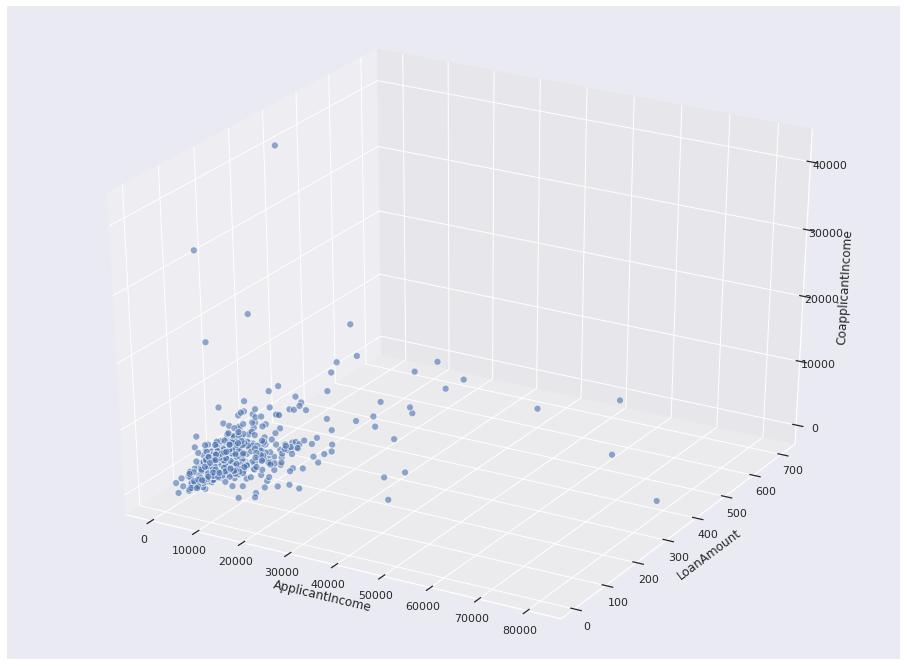

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

xscale = data['ApplicantIncome']
yscale =data['LoanAmount']
zscale =data['CoapplicantIncome']
ax.scatter(xscale, yscale, zscale, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('ApplicantIncome')
ax.set_ylabel('LoanAmount')
ax.set_zlabel('CoapplicantIncome')

plt.show()

Text(0.5, 1.05, 'Applicant Income - Loan Amount - Coapplicant Income')

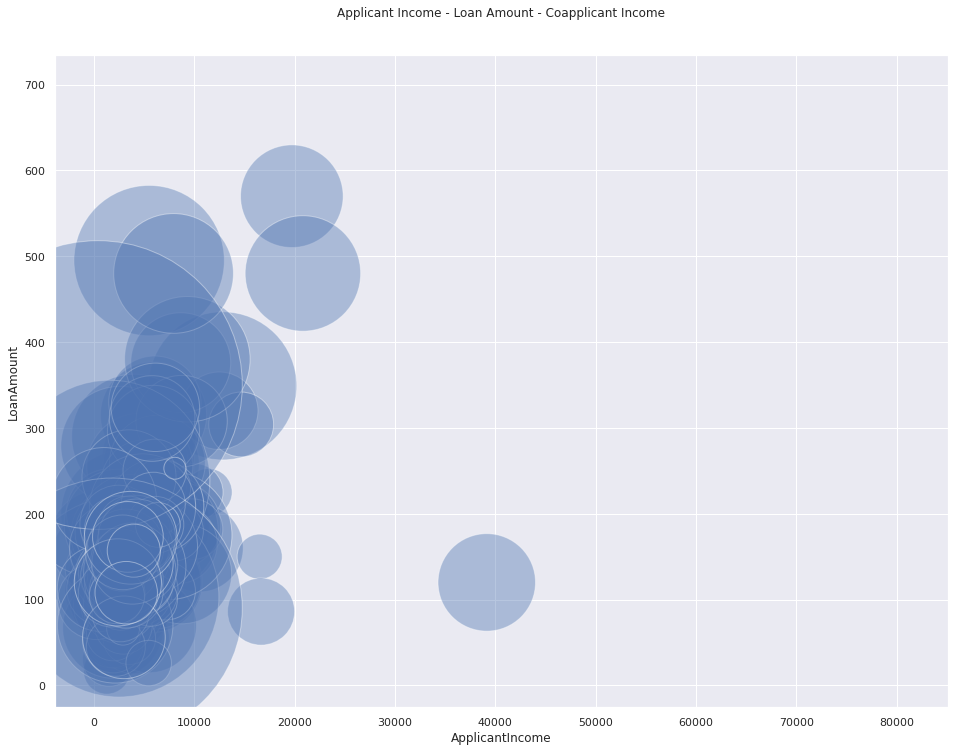

In [ ]:
fig = plt.figure(figsize=(16, 12))

plt.scatter(x = data['ApplicantIncome'], 
            y = data['LoanAmount'], 
            s = data['CoapplicantIncome'] * 2,
            alpha=0.4, 
            edgecolors='w')

plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Applicant Income - Loan Amount - Coapplicant Income', y=1.05)

# Data transformation

In [ ]:
#convert category to number
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
label_quality = LabelEncoder()  #convert category into number

data['Loan_Status'] = label_quality.fit_transform(data['Loan_Status'])
data['Education'] = label_quality.fit_transform(data['Education'])  #0= graduate
data['Married'] = label_quality.fit_transform(data['Married'])
data['Self_Employed'] = label_quality.fit_transform(data['Self_Employed'])
data['Gender'] = label_quality.fit_transform(data['Gender'])  #male=1
data['Property_Area'] = label_quality.fit_transform(data['Property_Area'])  #urban =2,rural=0, semiurban=1

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


Check Correlation between all variables.

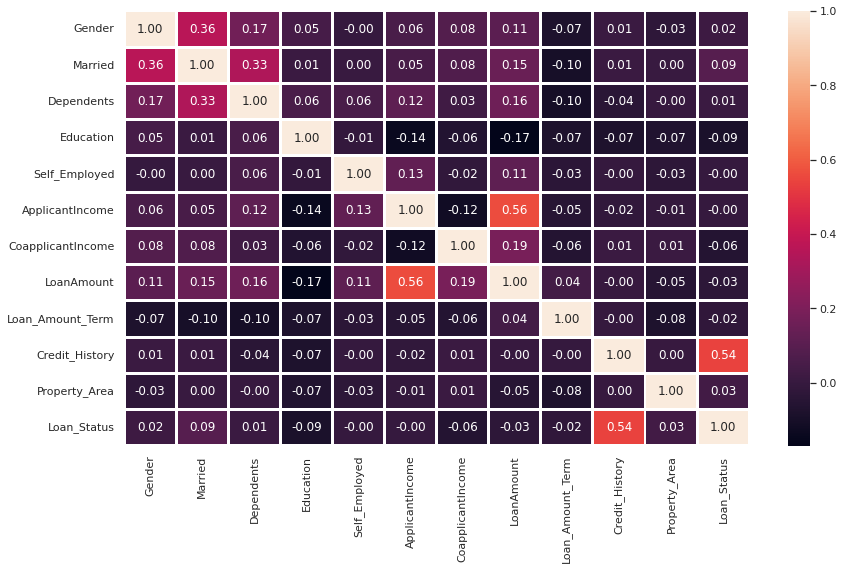

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=2)

The highest correlation is between LoanAmount & ApplicantIncome which is 0.56 followed by 0.54 between Credit_History and Loan_status.

# Machine Learning

* **Logistic Regression**
* **Random Forest Classification**
* **Support Vector Machine "rbf"**
* **Neural Network** with 5 different models

In [ ]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [ ]:
data=data.to_numpy()
x = data[:,:-1]
y = data[:,-1]
print(data.shape)
print(x.shape)
print(y.shape)

(614, 12)
(614, 11)
(614,)


In [ ]:
#feature selection
#use chi-square because the features are non-negative
#select the best 4 features k=4
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x_new = SelectKBest(score_func=chi2, k=4).fit_transform(x, y)

y.reshape(-1,1)
print(x_new.shape)
print(y.shape)

(614, 4)
(614,)


I split dataset into x_train 60%, x_cv 20%, x_test 20%

In [ ]:
x_train, x_, y_train, y_ = train_test_split(x_new, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_
print(x_train.shape)
print(x_test.shape)
print(x_cv.shape)

(368, 4)
(123, 4)
(123, 4)


In [ ]:
#feature scaling 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_cv = sc.transform(x_cv)

In [ ]:
#regularization
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_new,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(normalize=False)

In [ ]:
#modeling
models=[LogisticRegression(),
        RandomForestClassifier(),
        SVC(kernel='rbf')]

In [ ]:
model_names=['LogisticRegression',
             'RandomForestClassifier',
             'rbfSVM']

acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(x_train,y_train)
    pred=classification_model.predict(x_cv)
    acc.append(accuracy_score(pred,y_cv))
     
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['LogisticRegression',
  'RandomForestClassifier',
  'rbfSVM'],
 'Accuracy': [0.7804878048780488, 0.7804878048780488, 0.7804878048780488]}

In [ ]:
acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy
0,LogisticRegression,0.780488
1,RandomForestClassifier,0.780488
2,rbfSVM,0.780488


# Neural Network

In [ ]:
nn1 = MLPClassifier(alpha=0.1, hidden_layer_sizes=(3,2,), max_iter =2000, solver = 'adam') #faster converge than gradieant decent
nn1.fit(x_train,y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(3, 2), max_iter=2000)

In [ ]:
nn2 = MLPClassifier(alpha=0.1, hidden_layer_sizes=(4,3,2), max_iter =2000, solver = 'adam')
nn2.fit(x_train,y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(4, 3, 2), max_iter=2000)

In [ ]:
nn3 = MLPClassifier(alpha=0.1, hidden_layer_sizes=(5,4,3,2,), max_iter =2000, solver = 'adam')
nn3.fit(x_train,y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(5, 4, 3, 2), max_iter=2000)

In [ ]:
nn4 = MLPClassifier(alpha=0.1, hidden_layer_sizes=(6,5,4,3,2,), max_iter =2000, solver = 'adam')
nn4.fit(x_train,y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(6, 5, 4, 3, 2), max_iter=2000)

In [ ]:
nn5 = MLPClassifier(alpha=0.1, hidden_layer_sizes=(8,7,6,5,4,2), max_iter =2000, solver = 'adam')
nn5.fit(x_train,y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(8, 7, 6, 5, 4, 2), max_iter=2000)

In [ ]:
#Use Validation Set to Determine the Best Hyper Parameter
score = [nn1.score(x_cv, y_cv), nn2.score(x_cv, y_cv), nn3.score(x_cv, y_cv), nn4.score(x_cv, y_cv),nn5.score(x_cv, y_cv)]
score = np.array(score)
print('The highest score model is nn'+ str(score.argmax()+1),' with the score of', score.max())

The highest score model is nn3  with the score of 0.7967479674796748


Overall, among these algorithms, Neural Network nn3 gives the best result with the score of 79.67% based on cross validation set.


# Test the best model on the test set

Since the data is slightly imbalanced, i will use F1_score as evaluation metric.

In [ ]:
pred_nn3 = nn3.predict(x_test)
'''
accuracy = (pred_nn1==y_test).mean()
print("Accuracy is "+ str(accuracy))
'''
f1_scorenn1=f1_score(pred1, y_test)
print("f1_score is "+str(f1_scorenn1))

f1_score is 0.857142857142857


In [ ]:
#Logistic regression
'''
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(x_train, y_train)

pred1 = model1.predict(x_test)

accuracy1 = (pred1==y_test).mean()
print("Accuracy1 is "+ str(accuracy1))


f1_score1=f1_score(pred1,y_test)
print("f1_score1 is "+str(f1_score1))
'''

In [ ]:
'''
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)

pred2 = model2.predict(x_test)

accuracy2 = (pred2==y_test).mean()
print("Accuracy2 is "+ str(accuracy2))

f1_score2=f1_score(pred2,y_test)
print("f1_score2 is "+str(f1_score2))
'''

# Conclusion

After doing all the steps above, we can conclude that Neural Network nn3 with 4 hidden layers(5,4,3,2) is best suited to apply in Home Loan Approval prediction with the F1_score of 85.71%.




Therefore, Dream Housing Finance Company can use Neural Netwok model nn3 with 4 hidden layers(5,4,3,2) to apply for predicting Home Loan Approval real-time. They do not need to spend on hiring expert to evaluate home loan eligibility anymore. Moreover, using machine learning algorithm to predict real time save the company and applicants time too.


For future work, I would recommend Dream Housing Finance company to collect more sample data so that the model might predict with better result.








# Reference

https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval

https://www.datacamp.com/tutorial/feature-selection-python

https://scikit-learn.org/stable/modules/feature_selection.html

https://www.kaggle.com/code/sazid28/home-loan-prediction